In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pandas as pd
from pandas_datareader import data as pdr
import plotly.express as px
import yfinance as yf
yf.pdr_override()

sensex_no_of_stocks  = 20
largecap_no_of_stocks = 5
midcap_no_of_stocks = 5

In [4]:
stocks_sensex = ["^NSEI","AXISBANK.NS", "BANKBARODA.NS", "BHEL.NS", "BPCL.NS","BHARTIARTL.NS", "BOSCHLTD.NS", "CIPLA.NS",
                    "DRREDDY.NS", "GAIL.NS", "GRASIM.NS", "HCLTECH.NS", "HDFCBANK.NS","HEROMOTOCO.NS", "HINDALCO.NS", 
                    "HINDUNILVR.NS", "ITC.NS","ICICIBANK.NS", "IDEA.NS", "INDUSINDBK.NS", "INFY.NS", 
                    "KOTAKBANK.NS","LT.NS","LUPIN.NS","M&M.NS","MARUTI.NS","NTPC.NS","ONGC.NS","POWERGRID.NS","PNB.NS",
                    "RELIANCE.NS","SBIN.NS","SUNPHARMA.NS","TCS.NS","TATAMOTORS.NS","TATAPOWER.NS","TATASTEEL.NS","TECHM.NS",
                    "ULTRACEMCO.NS","VEDL.NS","WIPRO.NS","YESBANK.NS","ZEEL.NS"]


In [5]:
mid_cap= ["^NSEI","ADANIENT.NS","ADANIPOWER.NS","AJANTPHARM.NS","AMARAJABAT.NS","APOLLOHOSP.NS",
                   "APOLLOTYRE.NS","ARVIND.NS","BANKINDIA.NS","BERGEPAINT.NS","BHARATFORG.NS","BIOCON.NS",
                   "CESC.NS","CANBK.NS","CASTROLIND.NS","CENTURYTEX.NS","DALMIABHA.NS","DISHTV.NS",
                   "DIVISLAB.NS","ENGINERSIN.NS","EXIDEIND.NS","FEDERALBNK.NS","GMRINFRA.NS",
                   "GODREJIND.NS","IDBI.NS","IDFCBANK.NS","IDFC.NS","IRB.NS","IGL.NS","JINDALSTEL.NS",
                   "L&TFH.NS","M&MFIN.NS","MRPL.NS","MINDTREE.NS","MUTHOOTFIN.NS","NBCC.NS",
                   "PCJEWELLER.NS","PAGEIND.NS","RBLBANK.NS","RCOM.NS","RELINFRA.NS","RPOWER.NS","SRF.NS",
                   "STAR.NS","TVSMOTOR.NS","TATACHEM.NS","TATACOMM.NS","TATAGLOBAL.NS","UNIONBANK.NS",
                   "UBL.NS","VOLTAS.NS"]


In [6]:
large_cap = ["^NSEI","ADVENZYMES.NS", "AEGISCHEM.NS", "ALBK.NS", "ANDHRABANK.NS", "ASHOKA.NS", "ATUL.NS",
                    "AVANTIFEED.NS", "BEML.NS", "BSE.NS", "BAJAJELEC.NS", "BALRAMCHIN.NS","BBTC.NS", 
                    "CARERATING.NS", "CGPOWER.NS", "CANFINHOME.NS", "CAPF.NS", "CEATLTD.NS", "CENTURYPLY.NS",
                    "CHAMBLFERT.NS", "CHENNPETRO.NS", "COX&KINGS.NS", "DCBBANK.NS", "DELTACORP.NS",
                    "DENABANK.NS", "DBL.NS", "EIDPARRY.NS", "EQUITAS.NS", "ESCORTS.NS", "FSL.NS", "FCONSUMER.NS",
                    "FLFL.NS", "GDL.NS", "GODFRYPHLP.NS", "GRANULES.NS", "GMDCLTD.NS", 
                    "GSFC.NS", "HIMATSEIDE.NS", "HCC.NS", "HDIL.NS", "IFCI.NS", "ITI.NS", "INDIACEM.NS",
                    "ITDC.NS", "IBREALEST.NS", "IBVENTURES.NS","ICIL.NS", "INFIBEAM.NS", "INOXWIND.NS",
                    "JKLAKSHMI.NS","JKTYRE.NS", "JISLJALEQS.NS", "JPASSOCIAT.NS", "J&KBANK.NS", 
                    "JETAIRWAYS.NS", "JUSTDIAL.NS", "KALPATPOWR.NS","KTKBANK.NS", "KSCL.NS", "KEC.NS", 
                    "KWALITY.NS", "LAXMIMACH.NS","LAKSHVILAS.NS", "LAURUSLABS.NS", "MMTC.NS", "MOIL.NS",
                    "MANPASAND.NS","MONSANTO.NS", "NCC.NS", "NIITTECH.NS", "NFL.NS", "NAVKARCORP.NS", 
                    "OMAXE.NS", "ORIENTBANK.NS", "PNCINFRA.NS", "PTC.NS", "PVR.NS", "PERSISTENT.NS", 
                    "RAIN.NS", "RALLIS.NS", "RCF.NS", "RAYMOND.NS", "RNAVAL.NS", "REPCOHOME.NS",
                    "RUPA.NS", "SHK.NS", "SREINFRA.NS", "SCHNEIDER.NS", "SCI.NS", "SOBHA.NS", "SOUTHBANK.NS", 
                    "STRTECH.NS", "SWANENERGY.NS","TATAELXSI.NS", "TIMKEN.NS", "TRIDENT.NS", "UCOBANK.NS", 
                    "UJJIVAN.NS", "VRLLOG.NS", "WABAG.NS"]

In [7]:
start_time = pd.to_datetime('2021-01-01')
end_time = pd.to_datetime('2023-10-30') 

In [24]:
def calculate_params(stock_list , calc_type , start_remove , end_remove):
    stock_prices_large_cap = pdr.get_data_yahoo(stock_list,start_remove,end_remove)
    My_Portfolio= stock_prices_large_cap['Close']
    My_Portfolio = My_Portfolio.sort_index(ascending = True)

    My_Portfolio_Monthly = My_Portfolio.asfreq('M', method='ffill')
    My_Portfolio_Monthly_Chg = My_Portfolio_Monthly.pct_change().fillna(0)

    if (calc_type == 'BETA'):
        for idx, val in enumerate(stock_list[1:]):
            My_Portfolio_Monthly_Chg['BETA_'+ val] = (My_Portfolio_Monthly_Chg[val].rolling(6).cov(My_Portfolio_Monthly_Chg['^NSEI']))/(My_Portfolio_Monthly_Chg['^NSEI'].rolling(6).var())

    if (calc_type == 'VOL'):
        for idx, val in enumerate(stock_list[1:]): #create values to iterate over this so that we have clarity.
            My_Portfolio_Monthly_Chg['VOL_'+ val] = (My_Portfolio_Monthly_Chg[val].rolling(6).std())*np.sqrt(125)


    if (calc_type == 'VOL'):
        Volatility = My_Portfolio_Monthly_Chg.copy()
        del Volatility['^NSEI']

    if (calc_type == 'VOL'):
        for idx, val in enumerate(stock_list[1:]):
            del Volatility[val]

    if (calc_type == 'BETA'):
        Beta = My_Portfolio_Monthly_Chg.copy()
        del Beta['^NSEI']
        for idx, val in enumerate(stock_list[1:]): #create values to iterate over this so that we have clarity.
            del Beta[val]

    if (calc_type == 'BETA'):
        Beta = Beta.tail(1)
        Betas = Beta.T
        Betas.index.names= ['SYMBOL']
        Betas.columns= ['BETA']
        betas = Betas.sort_values(ascending= False,by='BETA')        
        return betas,My_Portfolio_Monthly_Chg

    if (calc_type == 'VOL'):
        Vol = Volatility.tail(1)
        Vols = Vol.T
        Vols.index.names= ['SYMBOL']
        Vols.columns= ['VOLATILITY']
        Vols = Vols.sort_values(ascending= False,by='VOLATILITY')
        return Vols,My_Portfolio_Monthly_Chg

In [25]:
Beta1,PortfolioS = calculate_params(stocks_sensex, 'BETA', start_time, end_time)
betas,PortfolioB = calculate_params(large_cap, 'BETA', start_time, end_time)
Vols,PortfolioV = calculate_params(mid_cap, 'VOL', start_time, end_time)
print("BETA  Large Cap  STOCKS")
print(betas)
print("BETAS For Sensex Stocks")
print(Beta1)
print("Volatility for  Mid Cap  Stocks")
print("Volatility=",Vols)

[*********************100%***********************]  43 of 43 completed
Got error from yahoo api for ticker ALBK.NS, Error: {'code': 'Not Found', 'description': 'No data found, symbol may be delisted'}
[*                      2%                       ]  2 of 100 completedGot error from yahoo api for ticker NIITTECH.NS, Error: {'code': 'Not Found', 'description': 'No data found, symbol may be delisted'}
[**                     5%                       ]  5 of 100 completedGot error from yahoo api for ticker KALPATPOWR.NS, Error: {'code': 'Not Found', 'description': 'No data found, symbol may be delisted'}
[*********             18%                       ]  18 of 100 completedGot error from yahoo api for ticker KWALITY.NS, Error: {'code': 'Not Found', 'description': 'No data found, symbol may be delisted'}
[****************      34%                       ]  34 of 100 completedGot error from yahoo api for ticker GDL.NS, Error: {'code': 'Not Found', 'description': 'No data found, symbol may

C:\Users\vagha\AppData\Local\Temp\ipykernel_21512\220958073.py:7: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  My_Portfolio_Monthly_Chg = My_Portfolio_Monthly.pct_change().fillna(0)


[**********************76%***********            ]  39 of 51 completedGot error from yahoo api for ticker MINDTREE.NS, Error: {'code': 'Not Found', 'description': 'No data found, symbol may be delisted'}
[**********************88%*****************      ]  45 of 51 completedGot error from yahoo api for ticker TATAGLOBAL.NS, Error: {'code': 'Not Found', 'description': 'No data found, symbol may be delisted'}
[*********************100%***********************]  51 of 51 completed

4 Failed downloads:
- DALMIABHA.NS: No data found for this date range, symbol may be delisted
- MINDTREE.NS: No data found for this date range, symbol may be delisted
- TATAGLOBAL.NS: No data found for this date range, symbol may be delisted
- IDFCBANK.NS: No data found for this date range, symbol may be delisted
BETA  Large Cap  STOCKS
                        BETA
SYMBOL                      
BETA_FCONSUMER.NS   9.919388
BETA_FLFL.NS        5.017945
BETA_BBTC.NS        4.268443
BETA_INOXWIND.NS    3.733960
BETA_

C:\Users\vagha\AppData\Local\Temp\ipykernel_21512\220958073.py:7: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  My_Portfolio_Monthly_Chg = My_Portfolio_Monthly.pct_change().fillna(0)


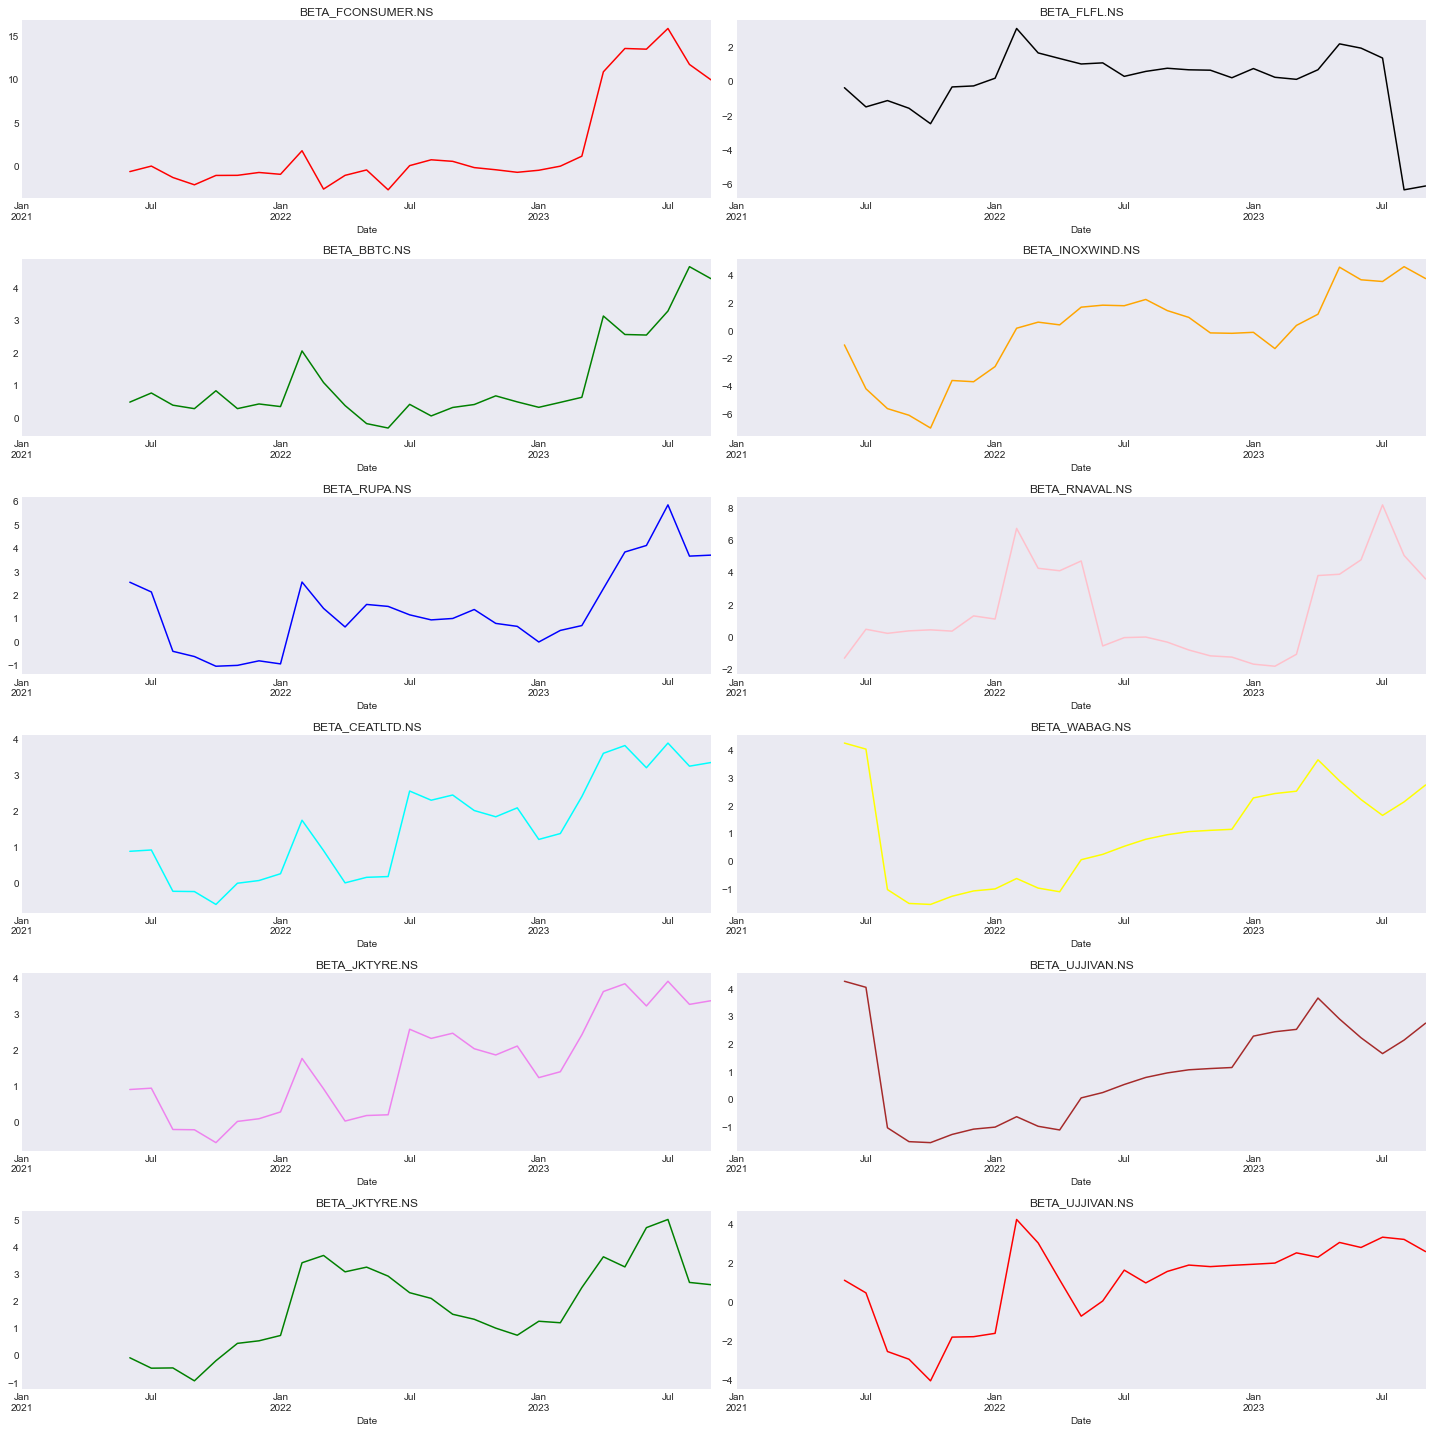

In [29]:
fig, axes = plt.subplots(nrows=6, ncols=2,figsize = (20,20))
PortfolioB[betas.index[0]].plot(ax=axes[0,0],color='red');axes[0,0].set_title(betas.index[0])
PortfolioB[betas.index[98]].plot(ax=axes[0,1],color='black');axes[0,1].set_title(betas.index[1])
PortfolioB[betas.index[2]].plot(ax=axes[1,0],color='green');axes[1,0].set_title(betas.index[2])
PortfolioB[betas.index[3]].plot(ax=axes[1,1],color='orange');axes[1,1].set_title(betas.index[3])
PortfolioB[betas.index[4]].plot(ax=axes[2,0],color='blue');axes[2,0].set_title(betas.index[4])
PortfolioB[betas.index[5]].plot(ax=axes[2,1],color='pink'); axes[2,1].set_title(betas.index[5])
PortfolioB[betas.index[6]].plot(ax=axes[3,0],color='cyan'); axes[3,0].set_title(betas.index[6])
PortfolioB[betas.index[7]].plot(ax=axes[3,1],color='yellow'); axes[3,1].set_title(betas.index[7])
PortfolioB[betas.index[6]].plot(ax=axes[4,0],color='violet'); axes[4,0].set_title(betas.index[8])
PortfolioB[betas.index[7]].plot(ax=axes[4,1],color='brown'); axes[4,1].set_title(betas.index[9])
PortfolioB[betas.index[8]].plot(ax=axes[5,0],color='green'); axes[5,0].set_title(betas.index[8])
PortfolioB[betas.index[9]].plot(ax=axes[5,1],color='red'); axes[5,1].set_title(betas.index[9])
fig.tight_layout()

plt.show()

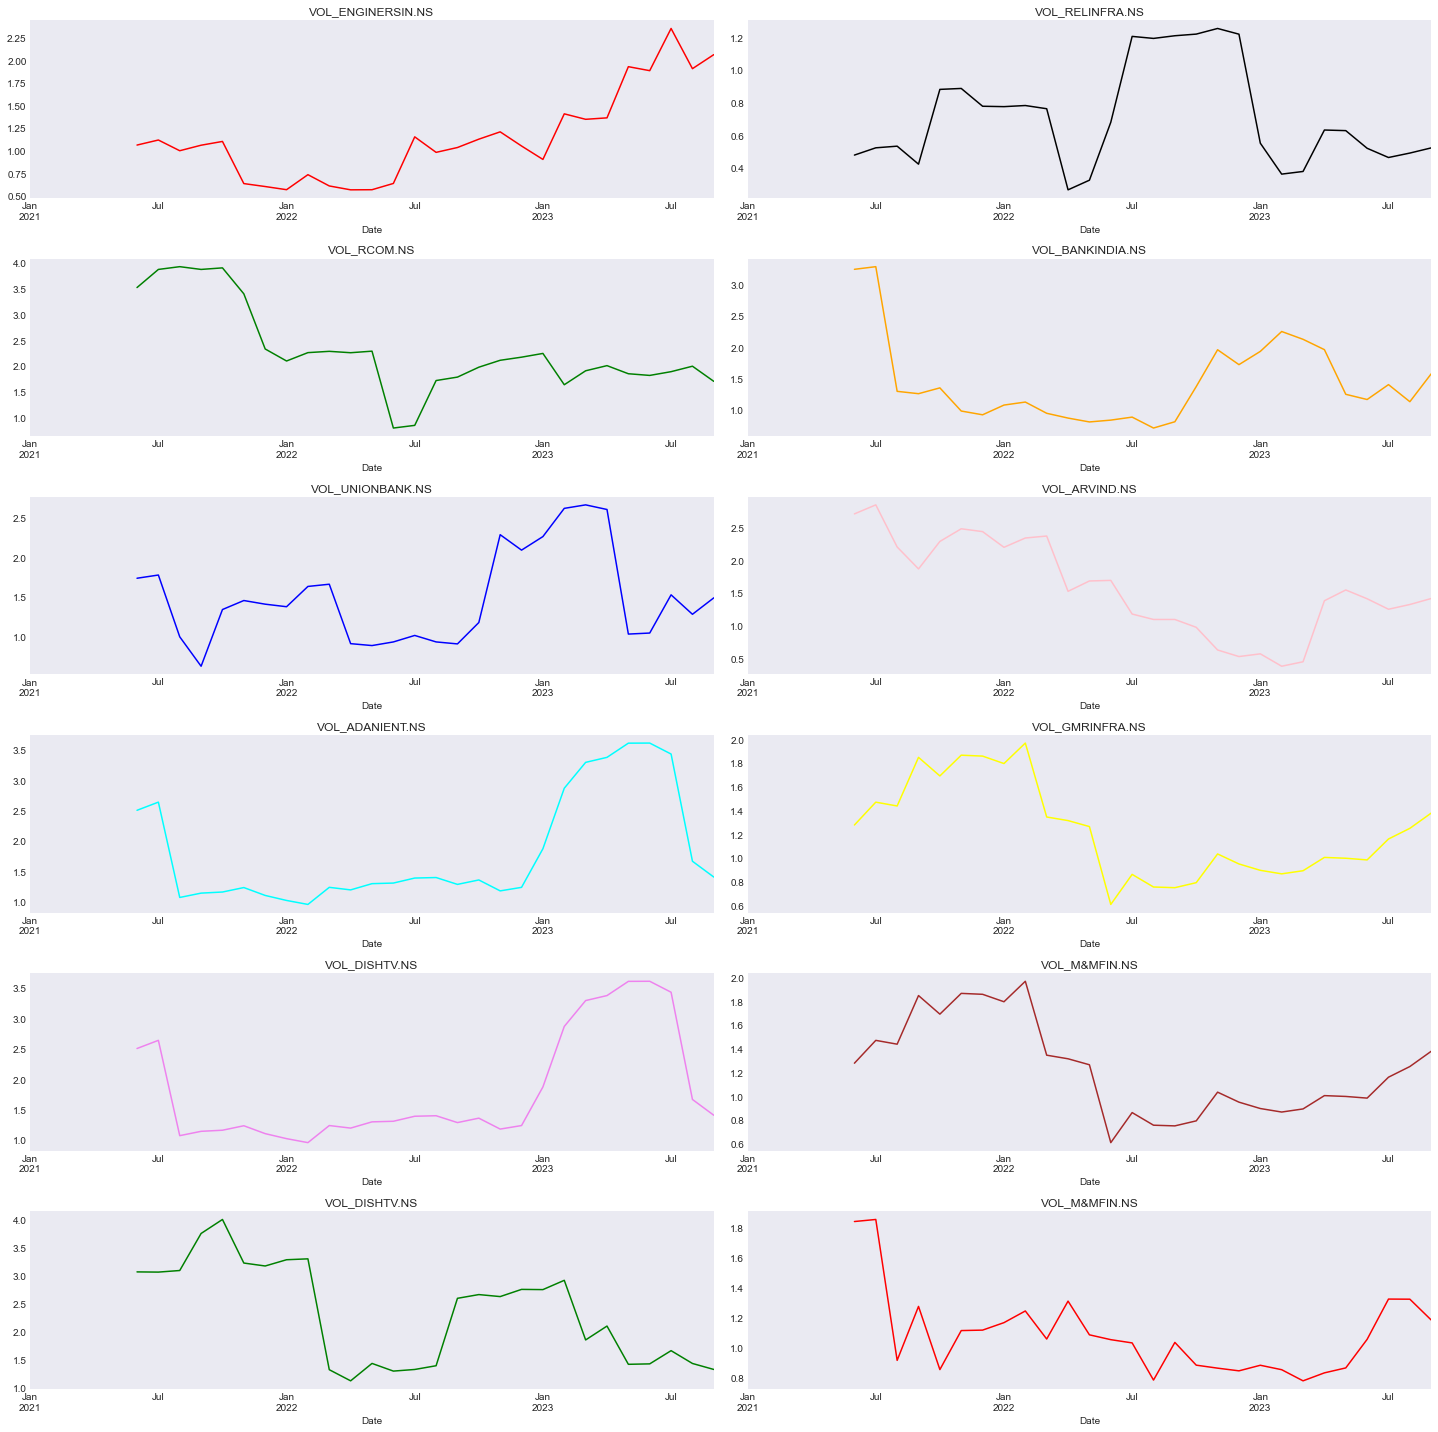

In [34]:
fig, axes = plt.subplots(nrows=6, ncols=2,figsize = (20,20))
PortfolioV[Vols.index[0]].plot(ax=axes[0,0],color='red');axes[0,0].set_title(Vols.index[0])
PortfolioV[Vols.index[40]].plot(ax=axes[0,1],color='black');axes[0,1].set_title(Vols.index[1])
PortfolioV[Vols.index[2]].plot(ax=axes[1,0],color='green');axes[1,0].set_title(Vols.index[2])
PortfolioV[Vols.index[3]].plot(ax=axes[1,1],color='orange');axes[1,1].set_title(Vols.index[3])
PortfolioV[Vols.index[4]].plot(ax=axes[2,0],color='blue');axes[2,0].set_title(Vols.index[4])
PortfolioV[Vols.index[5]].plot(ax=axes[2,1],color='pink'); axes[2,1].set_title(Vols.index[5])
PortfolioV[Vols.index[6]].plot(ax=axes[3,0],color='cyan'); axes[3,0].set_title(Vols.index[6])
PortfolioV[Vols.index[7]].plot(ax=axes[3,1],color='yellow'); axes[3,1].set_title(Vols.index[7])
PortfolioV[Vols.index[6]].plot(ax=axes[4,0],color='violet'); axes[4,0].set_title(Vols.index[8])
PortfolioV[Vols.index[7]].plot(ax=axes[4,1],color='brown'); axes[4,1].set_title(Vols.index[9])
PortfolioV[Vols.index[8]].plot(ax=axes[5,0],color='green'); axes[5,0].set_title(Vols.index[8])
PortfolioV[Vols.index[9]].plot(ax=axes[5,1],color='red'); axes[5,1].set_title(Vols.index[9])
fig.tight_layout()

plt.show()

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas_datareader import data as pdr

selected =[]

for i in range(midcap_no_of_stocks):
    selected.append(Vols.index[i][4:])

for i in range(largecap_no_of_stocks):
    selected.append(betas.index[i][5:])
    
for i in range(sensex_no_of_stocks):
    selected.append(Beta1.index[i][5:])

[*********************100%***********************]  30 of 30 completed


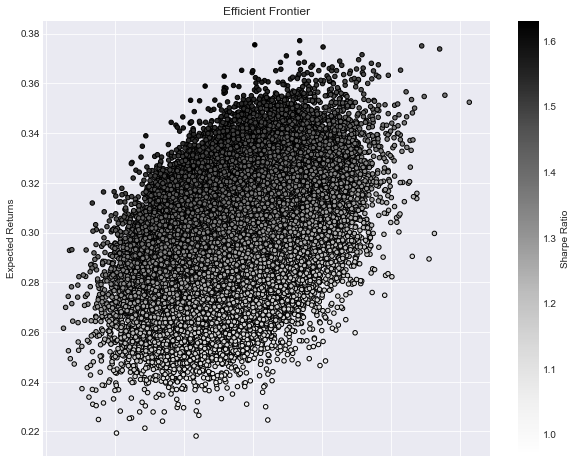

<Figure size 432x288 with 0 Axes>

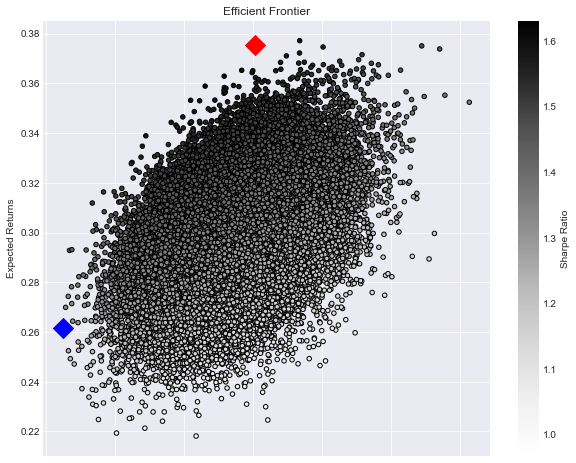

TWO PORTFOLIOS WITH MAX SHARPE RATIO AND MIN VOLATILITY
                   1163
Returns        0.261520
Volatility     0.202491
Sharpe Ratio   1.291514
PCJEWELLER.NS  0.001192
ADANIPOWER.NS  0.006391
MRPL.NS        0.042578
ADANIENT.NS    0.009999
DISHTV.NS      0.024550
CANFINHOME.NS  0.069769
IBREALEST.NS   0.035841
DELTACORP.NS   0.012558
REPCOHOME.NS   0.019891
IFCI.NS        0.064752
BHEL.NS        0.034013
ZEEL.NS        0.007901
HINDALCO.NS    0.053712
PNB.NS         0.015897
TATASTEEL.NS   0.009709
BANKBARODA.NS  0.005313
VEDL.NS        0.048888
GRASIM.NS      0.061976
TATAMOTORS.NS  0.062252
INDUSINDBK.NS  0.048287
TATAPOWER.NS   0.048869
AXISBANK.NS    0.032768
LUPIN.NS       0.040436
SBIN.NS        0.046034
LT.NS          0.029702
ULTRACEMCO.NS  0.031421
ICICIBANK.NS   0.031135
BPCL.NS        0.047721
IDEA.NS        0.014916
TECHM.NS       0.041528
                  45059
Returns        0.375486
Volatility     0.230256
Sharpe Ratio   1.630733
PCJEWELLER.NS  0.075367
ADANIPOW

<Figure size 432x288 with 0 Axes>

In [13]:
import matplotlib.cm as cm
cmap = cm.get_cmap('viridis')

table = pdr.get_data_yahoo(selected,start_time,end_time)

table= table['Close'] 

table = table.sort_index(ascending = True) 

table = table.dropna(how='all') 



returns_daily = table.pct_change()
returns_annual = returns_daily.mean() * 250

cov_daily = returns_daily.cov()
cov_annual = cov_daily * 250

port_returns = []
port_volatility = []
sharpe_ratio = []
stock_weights = []

num_assets = len(selected)
num_portfolios = 50000

np.random.seed(101)

for single_portfolio in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    returns = np.dot(weights, returns_annual)
    volatility = np.sqrt(np.dot(weights.T, np.dot(cov_annual, weights)))
    sharpe = returns / volatility
    sharpe_ratio.append(sharpe)
    port_returns.append(returns)
    port_volatility.append(volatility)
    stock_weights.append(weights)

portfolio = {'Returns': port_returns,
             'Volatility': port_volatility,
             'Sharpe Ratio': sharpe_ratio}

for counter,symbol in enumerate(selected):
    portfolio[symbol] = [Weight[counter] for Weight in stock_weights]
df = pd.DataFrame(portfolio)

column_order = ['Returns', 'Volatility', 'Sharpe Ratio'] + [stock for stock in selected]

df = df[column_order]

plt.style.use('seaborn-dark')
df.plot.scatter(x='Volatility', y='Returns', c='Sharpe Ratio',
                edgecolors='black', figsize=(10, 8), grid=True)
plt.xlabel('Volatility (Std. Deviation)')
plt.ylabel('Expected Returns')
plt.title('Efficient Frontier')
plt.show()
plt.savefig('fig-1.png')
min_volatility = df['Volatility'].min()
max_sharpe = df['Sharpe Ratio'].max()

sharpe_portfolio = df.loc[df['Sharpe Ratio'] == max_sharpe]
min_variance_port = df.loc[df['Volatility'] == min_volatility]

plt.style.use('seaborn-dark')
df.plot.scatter(x='Volatility', y='Returns', c='Sharpe Ratio',
                 edgecolors='black', figsize=(10, 8), grid=True)
plt.scatter(x=sharpe_portfolio['Volatility'], y=sharpe_portfolio['Returns'], c='red', marker='D', s=200)
plt.scatter(x=min_variance_port['Volatility'], y=min_variance_port['Returns'], c='blue', marker='D', s=200 )
plt.xlabel('Volatility (Std. Deviation)')
plt.ylabel('Expected Returns')
plt.title('Efficient Frontier')
plt.show()
plt.savefig('fig-2.png')

print("TWO PORTFOLIOS WITH MAX SHARPE RATIO AND MIN VOLATILITY")
print(min_variance_port.T)
print(sharpe_portfolio.T)

In [14]:
My_table = pdr.get_data_yahoo(selected,start_time,end_time)
My_table= My_table['Close'] # load all the closing prices this will be retirned as a pandas dataframwe.
My_table = My_table.sort_index(ascending = True) # as the prices are in descending order

My_table = My_table.dropna(how='all') # drop teh rows if price is zero


My_Portfolio_Returns = My_table.pct_change()

My_Portfolio_Returns= My_Portfolio_Returns.fillna(0)

# # ###########################COMPUTING KEY PORTFOLIO STATS , ALPHA/ BETA/ DRAWDOWN##

[*********************100%***********************]  30 of 30 completed


In [15]:
Weights= []
Stockamounts = []
#drop the first three rows , sharpe, returns and volatility
min_sharpe_portfolio = sharpe_portfolio.T[3:]
min_sharpe_portfolio.index.names= ['SYMBOL']
#Betas.rename(columns={'oldName1': 'newName1', 'oldName2': 'newName2'}, inplace=True)
min_sharpe_portfolio.columns= ['WEIGHT']

In [16]:
for idx, val in enumerate(selected):
    Weights.append(min_sharpe_portfolio._get_value(val,'WEIGHT'))

for idx, val in enumerate(selected):
    Stockamounts.append(val+"_AMT")

C:\Users\vagha\AppData\Local\Temp\ipykernel_21512\1329239759.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  My_Portfolio_Returns[col_name].iloc[z] = Allocation_Value[id]
C:\Users\vagha\AppData\Local\Temp\ipykernel_21512\1329239759.py:18: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '75366.9447885072' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  My_Portfolio_Returns[col_name].iloc[z] = Allocation_Value[id]
C:\Users\vagha\AppData\Local\Temp\ipykernel_21512\1329239759.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vi

-------------------COMPUTNG MAX DRAWDOWN-----------------------------


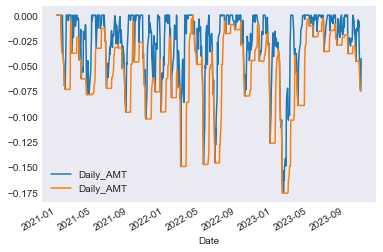

----------------COMPUTING ALPHA AND BETA FOR PORTFOLIO------------
[*********************100%***********************]  1 of 1 completed
Date
2021-01-01    0.000000
2021-01-04    0.008161
2021-01-05    0.004712
2021-01-06   -0.003750
2021-01-07   -0.000629
                ...   
2023-10-20   -0.004181
2023-10-23   -0.013350
2023-10-25   -0.008277
2023-10-26   -0.013853
2023-10-27    0.010076
Name: Rets, Length: 699, dtype: float64
----------------PORTFOLIO RETURNS----------------------------
----------------PORTFOLIO RETURNS-----ANNUALISED---%--------------------
32.30683252077694
------------PORTFOLIO SHARPE RATIO---------


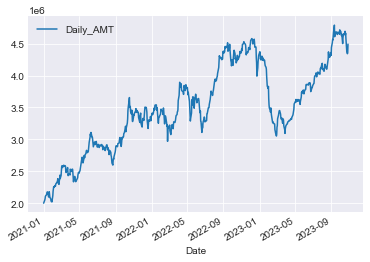

In [18]:
Amount = 1000000 # 1
Allocation_Value = [i * Amount for i in Weights]

#My_Portfolio_Returns = returns_daily
#My_Portfolio_Returns.fillna(0)
numofrows = len(My_Portfolio_Returns)

for id,col_name in enumerate(Stockamounts):# Add portfolio value coloumns and initiatlise to 0
    My_Portfolio_Returns[col_name] = 0                                    


for z in range(0,numofrows):
    try:
        
        if(z==0): #Fiets row will have initial portfolio value
                    ### Put a for loop here for looping through the various stocks and initiatising the  values
            for id,col_name in enumerate(Stockamounts):# allocate starting portfolio balance divinde equally for 10 st
                My_Portfolio_Returns[col_name].iloc[z] = Allocation_Value[id]                                    
        else:
            for id,col_name in enumerate(Stockamounts):# compute portfolio value for each stock.Todays returns * yesterdays value
                My_Portfolio_Returns[col_name].iloc[z] = (1+My_Portfolio_Returns[selected[id]].iloc[z])*My_Portfolio_Returns[col_name].iloc[z-1]

    except KeyError as e:
        print ("Error: Could not find the value")
        
                        


My_Portfolio_Returns['Daily_AMT'] = My_Portfolio_Returns.sum(axis=1)

My_Portfolio_Returns['AMT_CHANGE'] = My_Portfolio_Returns['Daily_AMT'].pct_change().fillna(0)

print("-------------------COMPUTNG MAX DRAWDOWN-----------------------------")
# Roll_Max = pd.rolling_max(My_Portfolio_Returns['Daily_AMT'], 12, min_periods=1)
Roll_Max = My_Portfolio_Returns['Daily_AMT'].rolling(window=12, min_periods=1).max()
Daily_Drawdown = My_Portfolio_Returns['Daily_AMT']/Roll_Max - 1.0

# Next we calculate the minimum (negative) daily drawdown in that window.
# Again, use min_periods=1 if you want to allow the expanding window
# Max_Daily_Drawdown = pd.rolling_min(Daily_Drawdown, 12, min_periods=1)

Max_Daily_Drawdown = Daily_Drawdown.rolling(window=12, min_periods=1).min()

# Plot the results
#SPY_Dat['Adj Close'].plot( )
Daily_Drawdown.plot()
Max_Daily_Drawdown.plot()
plt.legend()
plt.show()

print("----------------COMPUTING ALPHA AND BETA FOR PORTFOLIO------------")
#My_Portfolio_Returns['Daily_AMT'].plot(grid=True)
#plt.legend()

# compute returns
Index = pdr.get_data_yahoo("^NSEI",start_time,end_time)
Index['Rets'] = Index['Close'].pct_change().fillna(0)

print(Index['Rets'])
My_Portfolio_Returns= My_Portfolio_Returns[My_Portfolio_Returns.index.isin(Index.index)]
# covmat = np.cov(My_Portfolio_Returns['AMT_CHANGE'][1:],Index['Rets'][1:])

# calculate measures now

# beta = covmat[0,1]/covmat[1,1]      
# alpha= np.mean(My_Portfolio_Returns['AMT_CHANGE'])-beta*np.mean(Index['Rets'])

# volatility = np.sqrt(covmat[0,0])
momentum = np.prod(1+My_Portfolio_Returns['AMT_CHANGE'].tail(22).values) -1

# annualize the numbers
prd = 252. # used monthly returns; 12 periods to annualize
# alpha = alpha*252
# volatility = volatility*np.sqrt(prd)

# print ("PORTFOLIO BETA=",beta,"PORTFOLIOALPHA=",alpha, "PORTFOLIOVOLATILITY=", volatility,"MOMENTUM=", momentum)

print("----------------PORTFOLIO RETURNS----------------------------")
My_Portfolio_Returns['Daily_AMT'].plot(grid=True)
plt.legend()
Returns = (My_Portfolio_Returns['AMT_CHANGE'].mean()*250)## Annulaise returns

print("----------------PORTFOLIO RETURNS-----ANNUALISED---%--------------------")
print(Returns*100)


print("------------PORTFOLIO SHARPE RATIO---------")
Returns = (My_Portfolio_Returns['AMT_CHANGE'].mean()*250)## Annulaise returns

# Sharpe = Returns/ volatility

# print(Sharpe)

# print("Annualised Portfolio Shape =", Sharpe)

In [19]:
My_Portfolio_Returns

,ADANIENT.NS,ADANIPOWER.NS,AXISBANK.NS,BANKBARODA.NS,BHEL.NS,BPCL.NS,CANFINHOME.NS,DELTACORP.NS,DISHTV.NS,GRASIM.NS,...,LUPIN.NS_AMT,SBIN.NS_AMT,LT.NS_AMT,ULTRACEMCO.NS_AMT,ICICIBANK.NS_AMT,BPCL.NS_AMT,IDEA.NS_AMT,TECHM.NS_AMT,Daily_AMT,AMT_CHANGE
Date,,,,,,,,,,,,,,,,,,,,,
2021-01-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,40030.420067,65502.223741,8916.916926,15876.680809,12322.284218,58997.340335,42496.298069,8032.681361,2.000000e+06,0.000000
2021-01-04,0.006821,0.000997,0.001443,0.020155,0.050388,0.035083,-0.008055,-0.005871,-0.026119,0.033265,...,41072.271885,65889.046474,9037.917327,15985.911437,12420.395581,61067.150455,45152.316020,8229.812452,2.039013e+06,0.019507
2021-01-05,-0.000202,-0.007968,0.063631,-0.003040,-0.012300,-0.008474,-0.016139,-0.019584,-0.015326,-0.003266,...,41592.199399,66053.156557,8980.855063,16027.922766,12550.042078,60549.696746,45152.316020,8245.418362,2.050433e+06,0.005601
2021-01-06,-0.007079,0.018072,-0.015351,-0.001524,-0.018680,-0.011990,-0.004023,-0.010780,-0.007782,0.024238,...,40018.419786,66826.802024,9033.792476,16349.459180,12770.792289,59823.716354,44962.603295,8190.386334,2.072801e+06,0.010909
2021-01-07,0.055408,0.005917,0.025755,0.009924,-0.002538,0.012652,0.024549,-0.009615,0.003922,0.009395,...,40884.300045,67448.070800,9205.324197,16198.218689,12639.976663,60580.591334,45342.032363,8170.673024,2.109509e+06,0.017709
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-20,-0.003518,-0.017855,-0.011146,-0.013892,-0.030960,-0.020639,-0.004378,0.017241,-0.019553,-0.014855,...,47179.423376,132012.531836,20710.004297,25389.996224,21788.835269,53506.159652,44583.170609,9615.889932,4.578122e+06,-0.018679
2023-10-23,-0.035551,-0.064588,-0.016372,-0.035096,-0.059505,-0.010393,-0.033607,0.001541,-0.054131,-0.022401,...,46713.487359,129632.985713,20338.408464,24982.486918,21723.428169,52950.090065,41547.719971,9494.736450,4.367806e+06,-0.045939
2023-10-25,-0.022372,-0.011850,-0.009178,-0.002049,-0.012314,-0.008314,-0.020716,0.036923,-0.021084,-0.013297,...,45741.620900,130394.912097,20048.282436,24775.729991,21399.894353,52509.872827,41168.290903,9381.386674,4.342273e+06,-0.005846


In [20]:
Weights

[0.0753669447885072,
 0.0672000039595914,
 0.04510953909493626,
 0.022790534342668624,
 0.05663694480917561,
 0.0008949540489815056,
 0.03917048267385887,
 0.008486611750418637,
 0.000173545597953616,
 0.04249834337751103,
 0.044422312620648365,
 0.0253770037152573,
 0.042301043159690604,
 0.03636124855288479,
 0.008298830896427151,
 0.003947998607776065,
 0.0701298890044311,
 0.0007148335551369081,
 0.059767103015072404,
 0.01268358784380259,
 0.057793876482798434,
 0.027699522576038266,
 0.040030420066507845,
 0.06550222374070848,
 0.008916916926258322,
 0.015876680809382048,
 0.012322284218180622,
 0.05899734033531966,
 0.042496298069304765,
 0.008032681360771591]

In [22]:
 Stockamounts

['PCJEWELLER.NS_AMT',
 'ADANIPOWER.NS_AMT',
 'MRPL.NS_AMT',
 'ADANIENT.NS_AMT',
 'DISHTV.NS_AMT',
 'CANFINHOME.NS_AMT',
 'IBREALEST.NS_AMT',
 'DELTACORP.NS_AMT',
 'REPCOHOME.NS_AMT',
 'IFCI.NS_AMT',
 'BHEL.NS_AMT',
 'ZEEL.NS_AMT',
 'HINDALCO.NS_AMT',
 'PNB.NS_AMT',
 'TATASTEEL.NS_AMT',
 'BANKBARODA.NS_AMT',
 'VEDL.NS_AMT',
 'GRASIM.NS_AMT',
 'TATAMOTORS.NS_AMT',
 'INDUSINDBK.NS_AMT',
 'TATAPOWER.NS_AMT',
 'AXISBANK.NS_AMT',
 'LUPIN.NS_AMT',
 'SBIN.NS_AMT',
 'LT.NS_AMT',
 'ULTRACEMCO.NS_AMT',
 'ICICIBANK.NS_AMT',
 'BPCL.NS_AMT',
 'IDEA.NS_AMT',
 'TECHM.NS_AMT']